## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import time

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [310]:
df1 = pd.read_csv('creditcard.csv')

In [13]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [309]:
# Data description 
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [15]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Normal Class Share:',normal_share)
print('Fraudulent Class Share:',fraud_share)

Normal Class Share: 99.82725143693798
Fraudulent Class Share: 0.1727485630620034


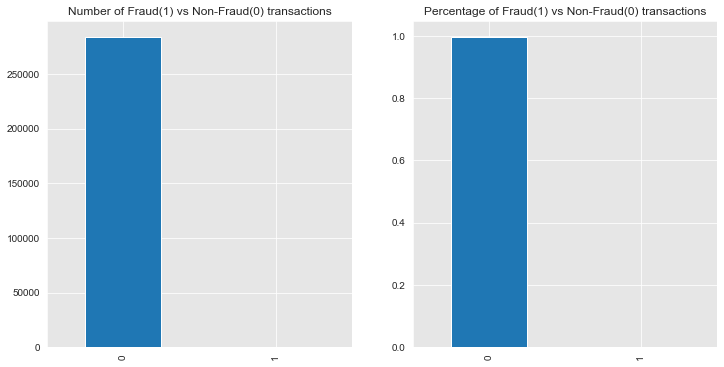

In [16]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['Class'].value_counts().plot.bar(title='Number of Fraud(1) vs Non-Fraud(0) transactions')
plt.subplot(1,2,2)
(df['Class'].value_counts()/len(df.Class)).plot.bar(title='Percentage of Fraud(1) vs Non-Fraud(0) transactions')

### We can clearly see  the data is heavily skewed.

In [311]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

Text(0, 0.5, 'Frequency')

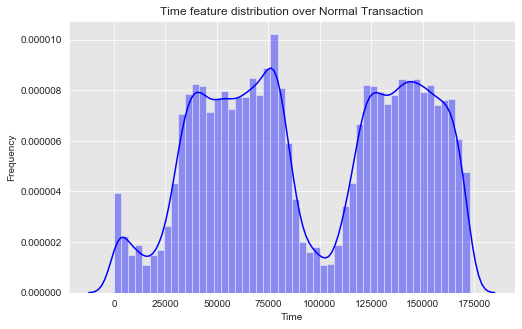

In [314]:
plt.figure(figsize=(8,5))
sns.distplot(normal.Time, color='b')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

`There are two peaks in the distribution but nothing significant`

Text(0, 0.5, 'Frequency')

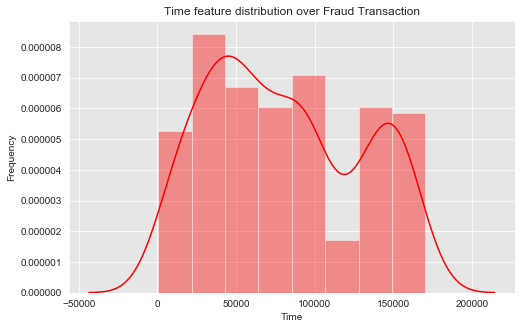

In [316]:
plt.figure(figsize=(8,5))
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

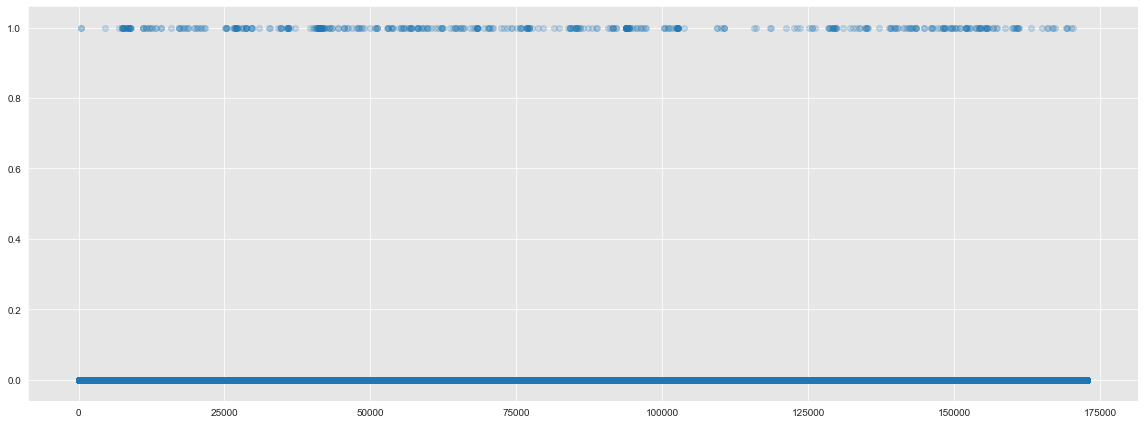

In [320]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(16,6))
plt.scatter(df.Time,df.Class,alpha=0.2)
plt.tight_layout()

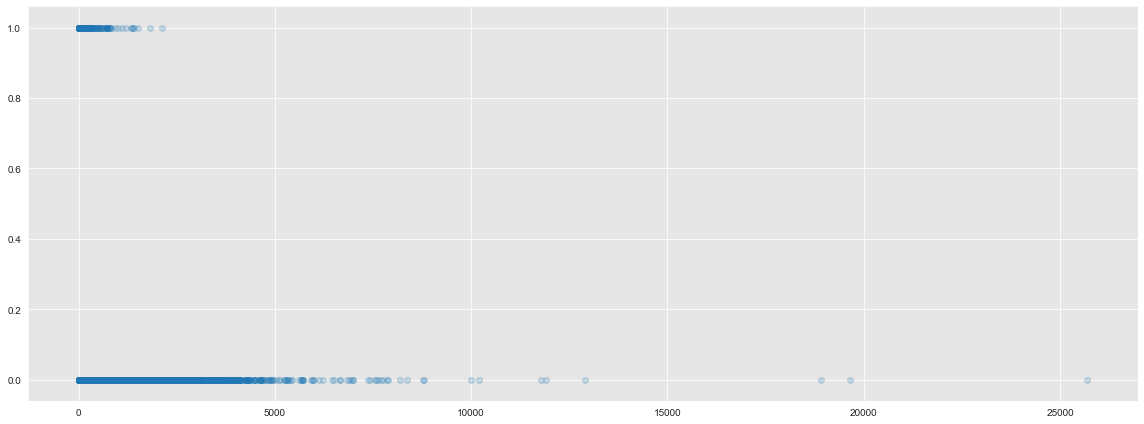

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(16,6))
# sns.scatterplot(x='Amount',y='Class',hue='Class',data=df)
plt.scatter(df.Amount,df.Class,alpha=0.2)
plt.tight_layout()

Text(0, 0.5, 'Frequency')

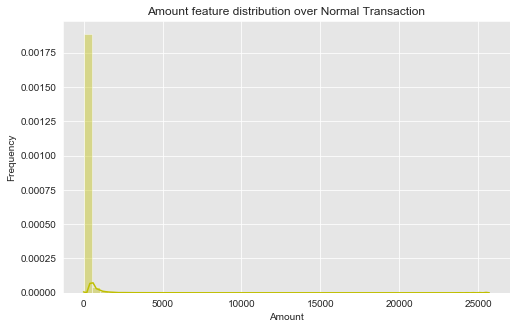

In [322]:
plt.figure(figsize=(8,5))
sns.distplot(normal.Amount, color='y')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

`We can see the distribution of Amount over Normal Transactions, we can interpret there is peak at the beginning but it becomes flat after the peak.`

Text(0, 0.5, 'Frequency')

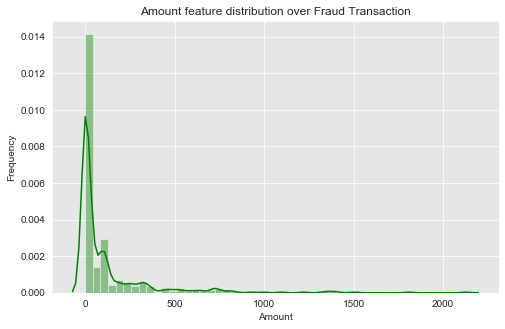

In [323]:
plt.figure(figsize=(8,5))
sns.distplot(fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

`We have a peak at less than 50 dollars`

In [19]:
# Drop unnecessary columns
# We can see the time column does not help much as both the classes are spread out through the entire range
df.drop(['Time'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [22]:
y=df['Class']
X=df.drop(['Class'],axis=1)

In [23]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [329]:
# Train test split with Stratification done using y variable
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,stratify=y,random_state=100)

In [330]:
X_train.shape

(227845, 29)

In [331]:
X_test.shape

(56962, 29)

In [332]:
y_train.value_counts()/len(y_train)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [333]:
y_test.value_counts()/len(y_test)

0    0.99828
1    0.00172
Name: Class, dtype: float64

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

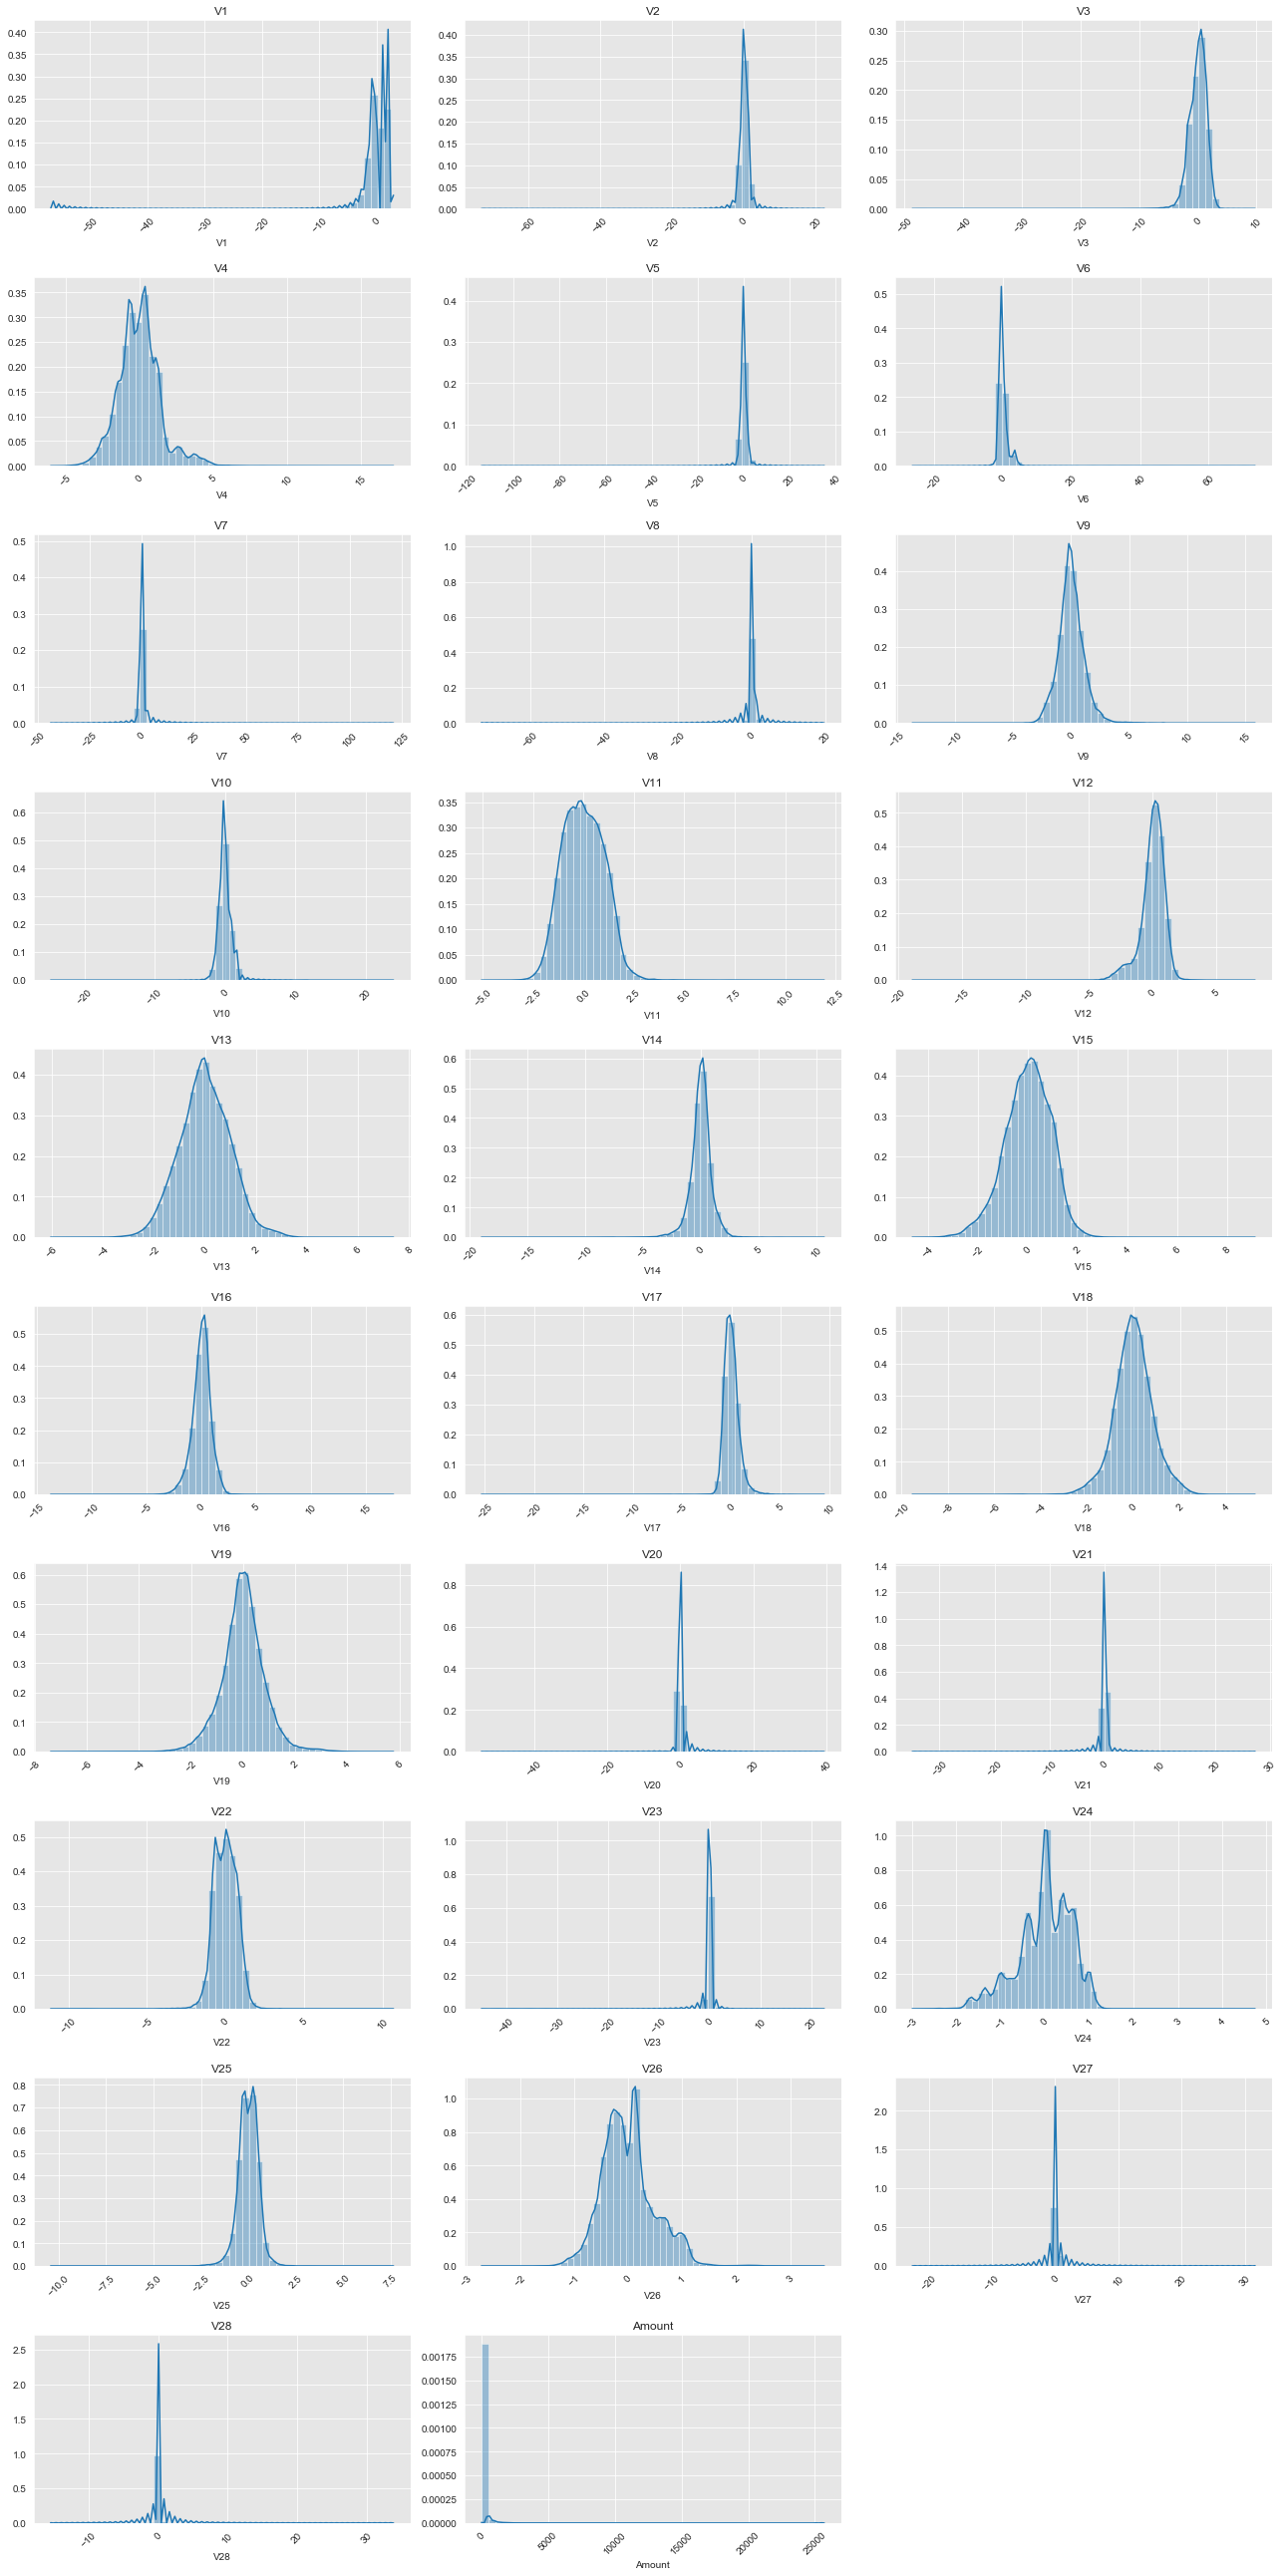

In [30]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(18,36))
for i,col in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    sns.distplot(X_train[col])
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()

`Some of the Columns including Amount Column as highly Skewed either to the Right or Left`

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [57]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(pt.fit_transform(X_test),columns=X_test.columns)

In [58]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.414341,-0.352037,-0.599219,-0.067550,-0.129205,0.326372,-0.541033,0.115625,1.025773,0.005709,0.345981,0.995214,-0.000195,0.047349,0.038343,0.706537,-1.172255,0.563763,0.712375,-0.223245,-0.256588,-0.668354,0.543815,0.000923,-0.840953,-0.574979,-0.011227,-0.133703,-1.619329
1,-0.343333,0.427569,0.256780,0.679871,0.243257,0.179406,0.503851,-0.125500,-0.649147,0.314539,0.543796,-0.132193,-0.690094,0.673220,0.544776,-1.231822,0.599722,0.272417,3.995461,0.263948,-0.156535,-0.378679,-0.188657,-0.776852,-0.981064,1.417840,-0.026888,0.459515,0.313601
2,-1.474262,-1.175561,0.855950,0.569615,0.787904,-0.049687,-0.370444,0.923863,-0.529840,-0.907168,1.078719,1.235635,-0.469755,0.666267,-0.515450,-0.768241,0.758673,-0.861430,-0.038202,1.087460,0.396218,-0.454678,0.334451,-0.530882,0.437817,0.722656,-0.260684,-1.137282,1.219296
3,1.241902,-0.686705,-1.042562,-0.081862,-0.419771,-1.002720,0.200703,-0.572151,-0.729926,0.745982,-0.757020,0.691282,1.424254,-0.032445,-0.389423,-1.884847,-0.053412,0.434532,-0.805649,-0.255596,-0.557964,-1.230034,0.211300,0.029927,-0.499203,0.970393,-0.244245,-0.085740,1.222670
4,1.636001,-0.424955,-1.004673,-0.627617,-0.300834,-1.209461,-0.095084,-0.493504,-0.633904,0.803305,-0.455978,-0.622283,0.334166,0.057971,0.241996,0.941045,0.237271,-2.154461,0.767706,-0.061150,0.087590,0.156477,0.338766,-0.233768,-0.160767,-0.599292,-0.117488,-0.186304,-0.539829


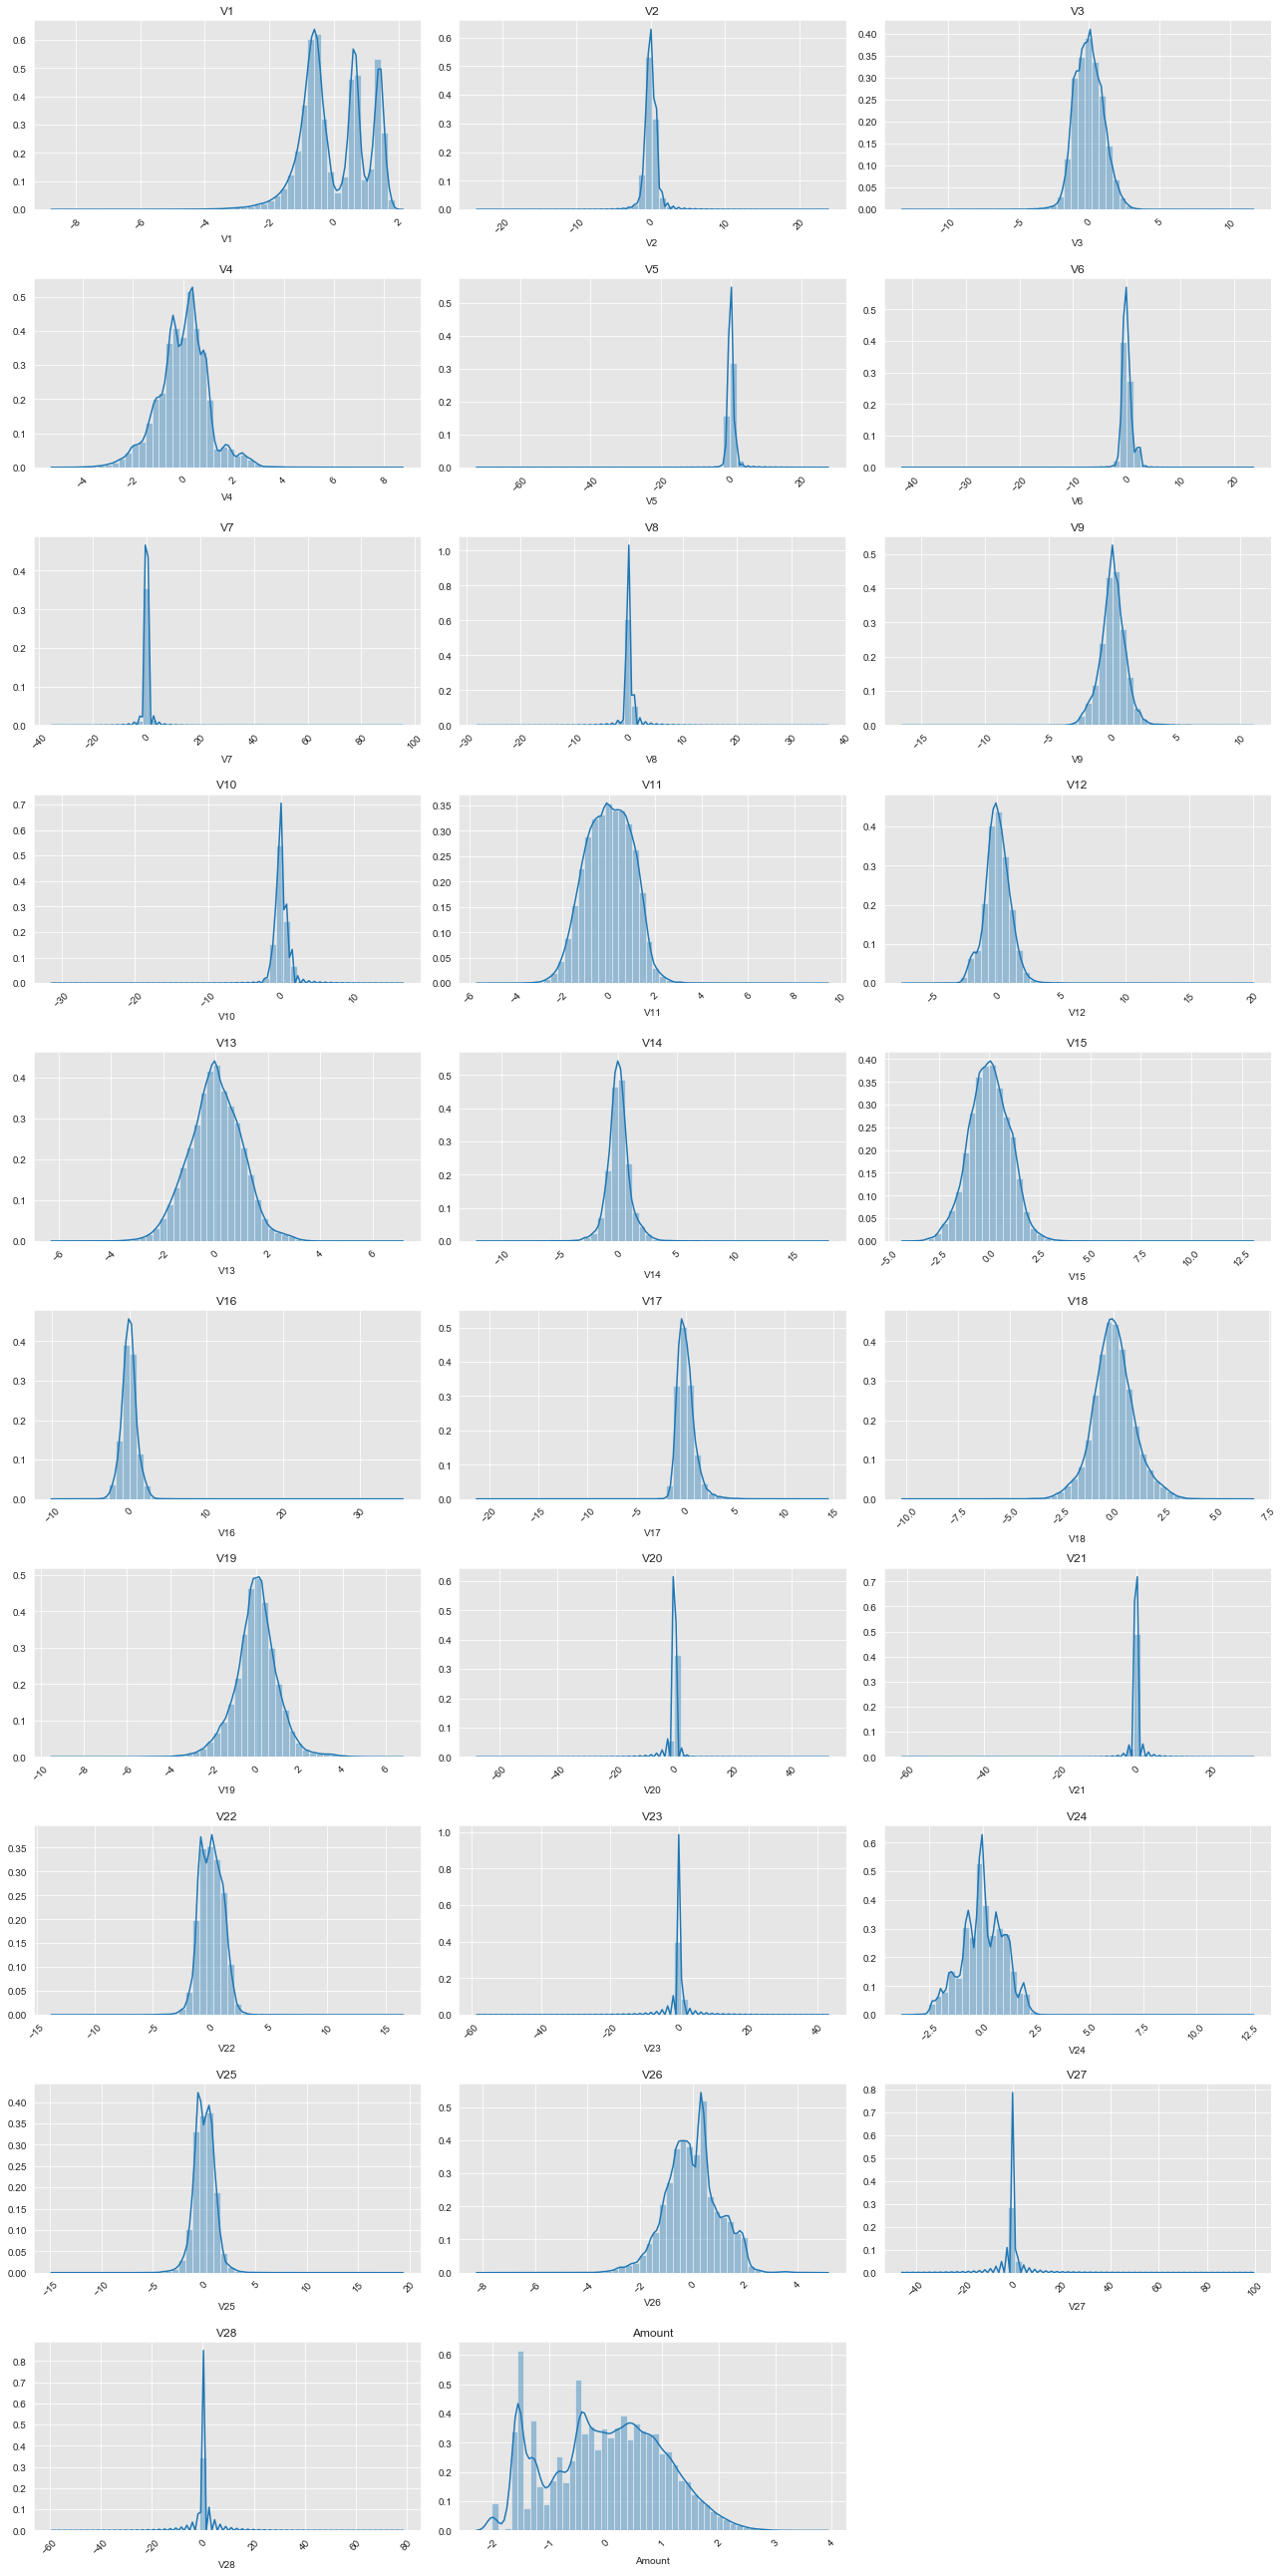

In [59]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(18,36))
for i,col in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    sns.distplot(X_train[col])
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()

## Model Building
- Build different models on the imbalanced dataset and see the result

## ROC - AUC will be used as primary evaluation metric

In [396]:
#Function to display model Evaluation Metrics
# ROC-AUC is used as primary metric and rest are just namesake
# ROC will show the strength of the classifier
# Other parameters like precision,recall,f1-score can be adjusted after getting the optimal threshold

from sklearn.metrics import roc_auc_score,roc_curve,classification_report

def evaluation_metrics(y_test,y_test_pred,y_test_pred_prob):
    print("Classification Report: \n\n" ,classification_report(y_test,y_test_pred))
    print("ROC AUC Score:", roc_auc_score(y_test,y_test_pred_prob))
    
    fpr, tpr, thresholds = roc_curve( y_test, y_test_pred_prob,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( y_test, y_test_pred_prob )
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.tight_layout()

In [360]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]}
lr = LogisticRegression()


lr_gs = GridSearchCV(estimator=lr,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
lr_gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [361]:
#Best Estimator
lr_gs.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [362]:
#Best parameters
lr_gs.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [363]:
# Make prediction
y_test_pred_lr = lr_gs.predict(X_test)
y_test_pred_prob_lr = lr_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9784631142834175


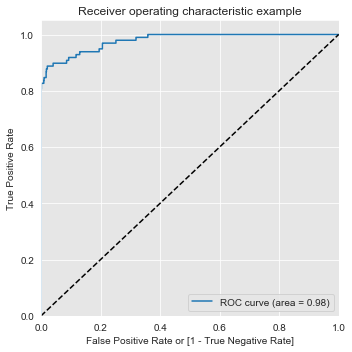

In [364]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_lr,y_test_pred_prob_lr[:,1])

In [372]:
# XG Boost Model
from xgboost import XGBClassifier

params = {"n_estimators":[50,100,150],"learning_rate":[0.01,0.1,0.3],'min_child_weight':[1,6,8],
         'max_depth':[4,5,6],'subsample':[i/10.0 for i in range(6,10)]}


xgb = XGBClassifier(objective= 'binary:logistic')

xgb_gs = GridSearchCV(estimator=xgb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
xgb_gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [373]:
#Best Estimator
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [374]:
#Best parameters
xgb_gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1}

In [375]:
#Best Score
xgb_gs.best_score_

0.9809442090672423

In [376]:
# Make prediction on train dataset
y_train_pred_xgb = xgb_gs.predict(X_train)
y_train_pred_prob_xgb = xgb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_xgb[:,1])

0.9999982703922373

In [377]:
# Make prediction on test dataset
y_test_pred_xgb = xgb_gs.predict(X_test)
y_test_pred_prob_xgb = xgb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9592557214923112


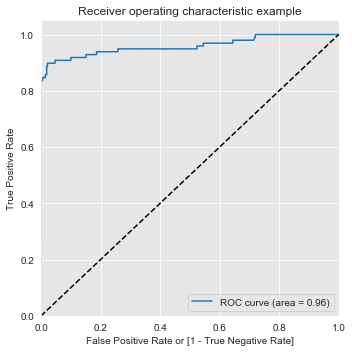

In [378]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_xgb,y_test_pred_prob_xgb[:,1])

In [388]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

params = {'var_smoothing': np.logspace(-1,-9, num=6)}

gnb = GaussianNB()

gnb_gs = GridSearchCV(estimator=gnb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
gnb_gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-01, 2.51188643e-03, 6.30957344e-05, 1.58489319e-06,
       3.98107171e-08, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [389]:
#Best Estimator
gnb_gs.best_estimator_

GaussianNB(priors=None, var_smoothing=6.309573444801929e-05)

In [390]:
#Best parameters
gnb_gs.best_params_

{'var_smoothing': 6.309573444801929e-05}

In [391]:
#Best Score
gnb_gs.best_score_

0.9716269981490641

In [392]:
# Make prediction on train dataset
y_train_pred_gnb = gnb_gs.predict(X_train)
y_train_pred_prob_gnb = gnb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_gnb[:,1])

0.9716096993011069

In [393]:
# Make prediction on test dataset
y_test_pred_gnb = gnb_gs.predict(X_test)
y_test_pred_prob_gnb = gnb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.19      0.56      0.28        98

    accuracy                           1.00     56962
   macro avg       0.59      0.78      0.64     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.964170419504324


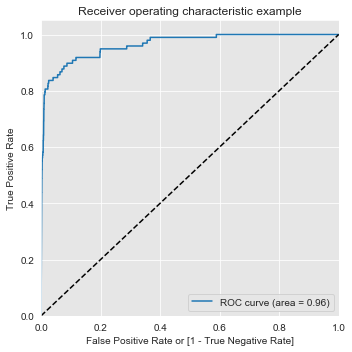

In [394]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_gnb,y_test_pred_prob_gnb[:,1])

## ROC_AUC Scores comparision for Classifiers on Imbalanced data

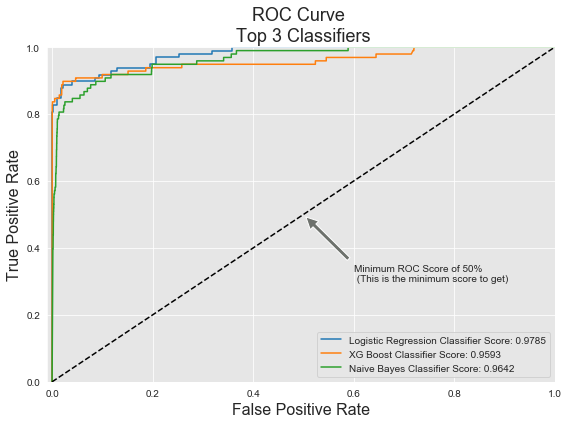

In [395]:
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test, y_test_pred_prob_gnb[:,1])
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_test_pred_prob_lr[:,1])
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_test_pred_prob_xgb[:,1])


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_lr[:,1])))
#     plt.plot(knear_fpr, knear_tpr, label='KNN Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_knn[:,1])))
    plt.plot(tree_fpr, tree_tpr, label='XG Boost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_xgb[:,1])))
    plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_gnb[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    plt.tight_layout()
    
graph_roc_curve_multiple(log_fpr, log_tpr, gnb_fpr, gnb_tpr,  tree_fpr, tree_tpr)
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [60]:
# Before Sampling
y_train.value_counts()

0    227449
1       396
Name: Class, dtype: int64

In [61]:
# Over sample using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_ros,y_train_ros = ros.fit_resample(X_train,y_train)

In [62]:
# After Sampling
y_train_ros.value_counts()

1    227449
0    227449
Name: Class, dtype: int64

## Model Building
- Build different models on the balanced dataset and see the result

In [401]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {"penalty": ['l1', 'l2'], 'C': [10, 100,500,800,1000,2000,3000,7000]}
lr = LogisticRegression()


lr_gs = GridSearchCV(estimator=lr,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
lr_gs.fit(X_train_ros,y_train_ros)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10, 100, 500, 800, 1000, 2000, 3000, 7000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [402]:
#Best Estimator
lr_gs.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [403]:
#Best parameters
lr_gs.best_params_

{'C': 1000, 'penalty': 'l2'}

In [70]:
# Make prediction
y_test_pred_lr = lr_gs.predict(X_test)
y_test_pred_prob_lr = lr_gs.predict_proba(X_test)

In [86]:
pd.DataFrame(y_test_pred_prob_lr).head()

,0,1
0,0.977489,0.022511
1,0.841134,0.158866
2,0.978389,0.021611
3,0.979909,0.020091
4,0.047313,0.952687


In [102]:
#Function to display model Evaluation Metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

def evaluation_metrics(y_test,y_test_pred,y_test_pred_prob):
    print("Classification Report: \n\n" ,classification_report(y_test,y_test_pred))
    print("ROC AUC Score:", roc_auc_score(y_test,y_test_pred_prob))
    
    fpr, tpr, thresholds = roc_curve( y_test, y_test_pred_prob,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( y_test, y_test_pred_prob )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.tight_layout()
     

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC Score: 0.970901622527814


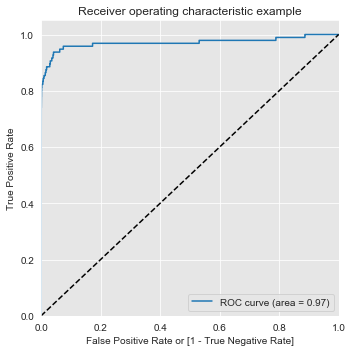

In [103]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_lr,y_test_pred_prob_lr[:,1])

In [303]:
# K- Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

params = {"n_neighbors":[15,30,45,60], 'algorithm': ['auto']}
knn = KNeighborsClassifier()

t1 = time.time()
knn_gs = GridSearchCV(estimator=knn,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
knn_gs.fit(X_train_ros,y_train_ros)
t2 = time.time()
print(t2-t1)

51219.03903770447


In [304]:
#Best Estimator
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [305]:
#Best parameters
knn_gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 15}

In [306]:
#Best Score
knn_gs.best_score_

0.9998593091391713

In [307]:
# Make prediction
t1 = time.time()
y_test_pred_knn = knn_gs.predict(X_test)
y_test_pred_prob_knn = knn_gs.predict_proba(X_test)
t2 = time.time()
print(t2-t1)

1490.8025736808777


Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.44      0.80      0.57        96

    accuracy                           1.00     56962
   macro avg       0.72      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9110071630382536


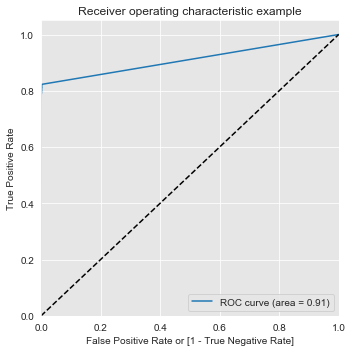

In [308]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_knn,y_test_pred_prob_knn[:,1])

In [ ]:
# XG Boost Model
from xgboost import XGBClassifier

params = {"n_estimators":[50,100,150],"learning_rate":[0.01,0.1,0.3],'min_child_weight':[1,6,8],
          'max_depth':[4,5,6,7,8],'subsample':[i/10.0 for i in range(6,10)]}

xgb = XGBClassifier(objective= 'binary:logistic')

xgb_gs = GridSearchCV(estimator=xgb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
xgb_gs.fit(X_train_ros,y_train_ros)

In [405]:
#Best Estimator
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
              validate_parameters=False, verbosity=None)

In [406]:
#Best parameters
xgb_gs.best_params_

{'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [407]:
#Best Score
xgb_gs.best_score_

0.999991903442225

In [408]:
# Make prediction on train dataset
y_train_pred_xgb = xgb_gs.predict(X_train)
y_train_pred_prob_xgb = xgb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_xgb[:,1])

0.9897519401010273

In [409]:
# Make prediction on test dataset
y_test_pred_xgb = xgb_gs.predict(X_test)
y_test_pred_prob_xgb = xgb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.83      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9957587670690111


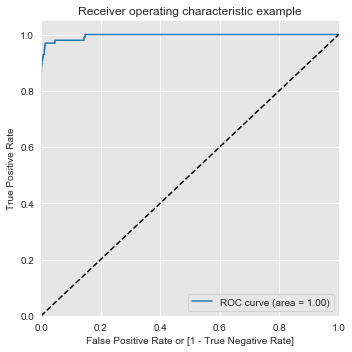

In [410]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_xgb,y_test_pred_prob_xgb[:,1])

In [213]:
np.logspace(5,-1, num=6)

array([1.00000000e+05, 6.30957344e+03, 3.98107171e+02, 2.51188643e+01,
       1.58489319e+00, 1.00000000e-01])

In [216]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# params = {"n_estimators":[50,100,150],"learning_rate":[0.01,0.1,0.3],'min_child_weight':[1,6,8],
#          'max_depth':[4,5,6],'subsample':[i/10.0 for i in range(6,10)]}


params = {'var_smoothing': [0.1,0.3,0.5,0.6,0.7,0.8]}

gnb = GaussianNB()

gnb_gs = GridSearchCV(estimator=gnb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
gnb_gs.fit(X_train_ros,y_train_ros)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': [0.1, 0.5, 0.7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [218]:
#Best Estimator
gnb_gs.best_estimator_

GaussianNB(priors=None, var_smoothing=0.5)

In [219]:
#Best parameters
gnb_gs.best_params_

{'var_smoothing': 0.5}

In [220]:
#Best Score
gnb_gs.best_score_

0.9734327821619639

In [221]:
# Make prediction on train dataset
y_train_pred_gnb = gnb_gs.predict(X_train)
y_train_pred_prob_gnb = gnb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_gnb[:,1])

0.9733570920172092

In [222]:
# Make prediction on test dataset
y_test_pred_gnb = gnb_gs.predict(X_test)
y_test_pred_prob_gnb = gnb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.36      0.43      0.39        96

    accuracy                           1.00     56962
   macro avg       0.68      0.71      0.70     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9641183146930211


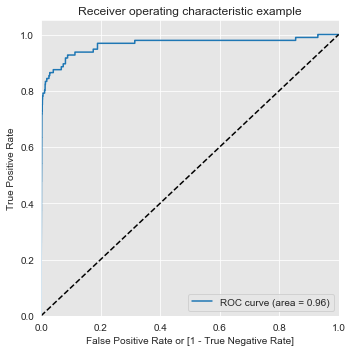

In [223]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_gnb,y_test_pred_prob_gnb[:,1])

### ROC_AUC Scores comparision for Classifiers on Random-Oversampled data

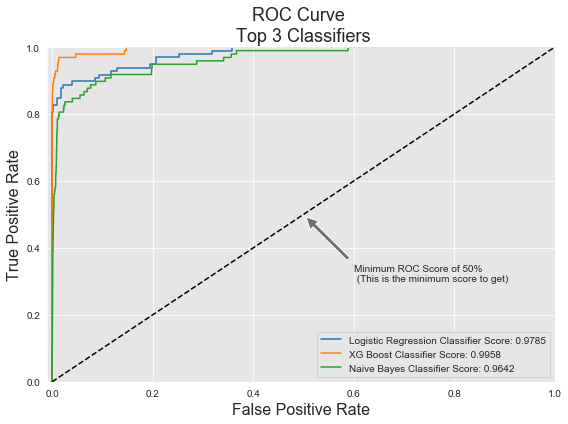

In [412]:
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test, y_test_pred_prob_gnb[:,1])
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_test_pred_prob_lr[:,1])
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_test_pred_prob_xgb[:,1])


def graph_roc_curve_multiple(log_fpr, log_tpr, gnb_fpr, gnb_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_lr[:,1])))
    plt.plot(tree_fpr, tree_tpr, label='XG Boost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_xgb[:,1])))
    plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_gnb[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    plt.tight_layout()
    
graph_roc_curve_multiple(log_fpr, log_tpr, gnb_fpr, gnb_tpr,  tree_fpr, tree_tpr)
plt.show()

###  SMOTE 

In [229]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [231]:
# Before SMOTE samping
X_train_smote.value_counts()

0    227449
1       396
Name: Class, dtype: int64

In [232]:
# After SMOTE samping
y_train_smote.value_counts()

1    227449
0    227449
Name: Class, dtype: int64

### Model Building
- Build different models on the balanced dataset and see the result

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]}
lr = LogisticRegression()


lr_gs = GridSearchCV(estimator=lr,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
lr_gs.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [243]:
#Best Estimator
lr_gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [244]:
#Best parameters
lr_gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [245]:
# Make prediction
y_test_pred_lr = lr_gs.predict(X_test)
y_test_pred_prob_lr = lr_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC AUC Score: 0.9682417693935451


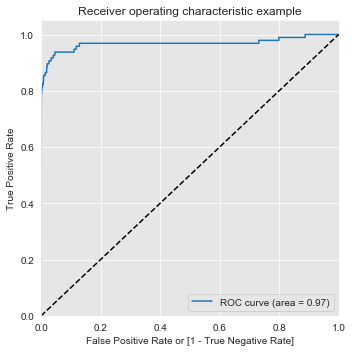

In [246]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_lr,y_test_pred_prob_lr[:,1])

In [413]:
# XG Boost Model
from xgboost import XGBClassifier

params = {"n_estimators":[50,100,150],"learning_rate":[0.01,0.1,0.3],'min_child_weight':[1,6,8],
         'max_depth':[5,6,7,8],'subsample':[i/10.0 for i in range(6,10)]}


xgb = XGBClassifier(objective= 'binary:logistic')
t1=time.time()
xgb_gs = GridSearchCV(estimator=xgb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
xgb_gs.fit(X_train_smote,y_train_smote)
t2=time.time()
print(t2-t1)

370.8178493976593


In [414]:
#Best Estimator
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
              validate_parameters=False, verbosity=None)

In [415]:
#Best parameters
xgb_gs.best_params_

{'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [416]:
#Best Score
xgb_gs.best_score_

0.9999933719310867

In [417]:
# Make prediction on train dataset
y_train_pred_xgb = xgb_gs.predict(X_train)
y_train_pred_prob_xgb = xgb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_xgb[:,1])

0.9913281260757743

In [418]:
# Make prediction on test dataset
y_test_pred_xgb = xgb_gs.predict(X_test)
y_test_pred_prob_xgb = xgb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.88      0.84        98

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9954385436645115


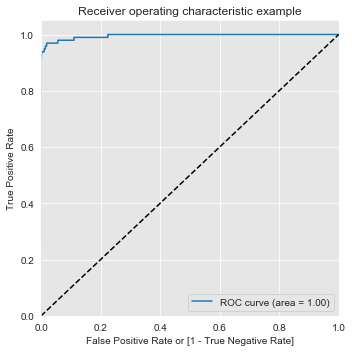

In [419]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_xgb,y_test_pred_prob_xgb[:,1])

In [254]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

params = {'var_smoothing': [0.1,0.3,0.5,0.6,0.7,0.8]}

gnb = GaussianNB()

gnb_gs = GridSearchCV(estimator=gnb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
gnb_gs.fit(X_train_ros,y_train_ros)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [255]:
#Best Estimator
gnb_gs.best_estimator_

GaussianNB(priors=None, var_smoothing=0.3)

In [256]:
#Best parameters
gnb_gs.best_params_

{'var_smoothing': 0.3}

In [257]:
#Best Score
gnb_gs.best_score_

0.9744432916835163

In [258]:
# Make prediction on train dataset
y_train_pred_gnb = gnb_gs.predict(X_train)
y_train_pred_prob_gnb = gnb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_gnb[:,1])

0.9743733593558169

In [259]:
# Make prediction on test dataset
y_test_pred_gnb = gnb_gs.predict(X_test)
y_test_pred_prob_gnb = gnb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.27      0.49      0.35        96

    accuracy                           1.00     56962
   macro avg       0.64      0.74      0.67     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9628913806140752


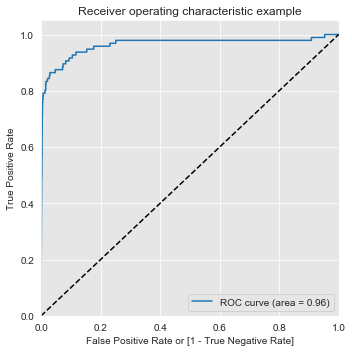

In [260]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_gnb,y_test_pred_prob_gnb[:,1])

### Compare AUC Scores of different models on SMOTE sampled Data

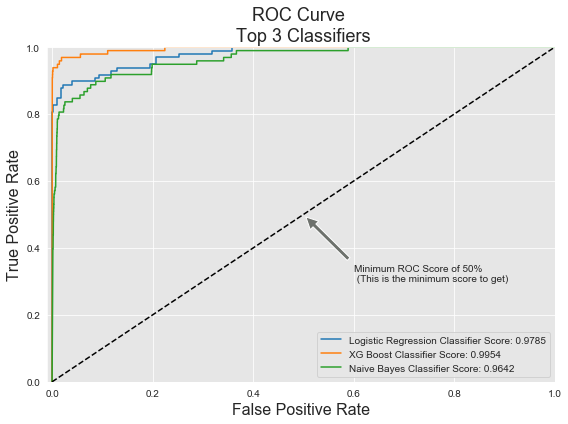

In [421]:
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test, y_test_pred_prob_gnb[:,1])
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_test_pred_prob_lr[:,1])
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_test_pred_prob_xgb[:,1])


def graph_roc_curve_multiple(log_fpr, log_tpr, gnb_fpr, gnb_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_lr[:,1])))
#     plt.plot(knear_fpr, knear_tpr, label='KNN Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_knn[:,1])))
    plt.plot(tree_fpr, tree_tpr, label='XG Boost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_xgb[:,1])))
    plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_gnb[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    plt.tight_layout()
    
graph_roc_curve_multiple(log_fpr, log_tpr, gnb_fpr, gnb_tpr,  tree_fpr, tree_tpr)
plt.show()

### ADASYN

In [265]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [269]:
# Before ADASYN samping
y_train.value_counts()

0    227449
1       396
Name: Class, dtype: int64

In [270]:
# After ADASYN samping
y_train_adasyn.value_counts()

0    227449
1    227446
Name: Class, dtype: int64

### Model Building
- Build different models on the balanced dataset and see the result

In [282]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]}
lr = LogisticRegression()


lr_gs = GridSearchCV(estimator=lr,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
lr_gs.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [283]:
#Best Estimator
lr_gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
#Best parameters
lr_gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [285]:
#Best Score
lr_gs.best_score_

0.9445826743639166

In [286]:
y_test_pred_lr = lr_gs.predict(X_test)
y_test_pred_prob_lr = lr_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

ROC AUC Score: 0.9674433829822155


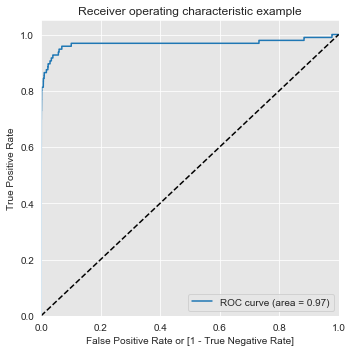

In [281]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_lr,y_test_pred_prob_lr[:,1])

In [422]:
# XG Boost Model
from xgboost import XGBClassifier

params = {"n_estimators":[50,100,150],"learning_rate":[0.01,0.1,0.3],'min_child_weight':[1,6,8],
         'max_depth':[4,5,6],'subsample':[i/10.0 for i in range(6,10)]}

xgb = XGBClassifier(objective= 'binary:logistic')

xgb_gs = GridSearchCV(estimator=xgb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
xgb_gs.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [288]:
#Best Estimator
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
              validate_parameters=False, verbosity=None)

In [428]:
#Best parameters
xgb_gs.best_params_

{'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [429]:
#Best Score
xgb_gs.best_score_

0.9947242547324633

In [430]:
# Make prediction on train dataset
y_train_pred_xgb = xgb_gs.predict(X_train)
y_train_pred_prob_xgb = xgb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_xgb[:,1])

0.9935803208754932

In [431]:
# Make prediction on test dataset
y_test_pred_xgb = xgb_gs.predict(X_test)
y_test_pred_prob_xgb = xgb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.89      0.84        98

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9902838351153631


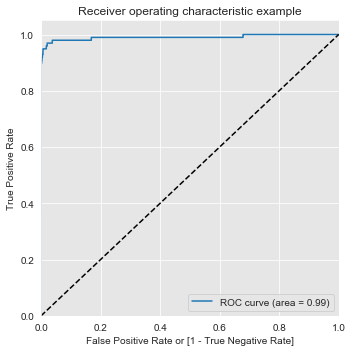

In [432]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_xgb,y_test_pred_prob_xgb[:,1])

In [294]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# params = {"n_estimators":[50,100,150],"learning_rate":[0.01,0.1,0.3],'min_child_weight':[1,6,8],
#          'max_depth':[4,5,6],'subsample':[i/10.0 for i in range(6,10)]}


params = {'var_smoothing': [0.1,0.3,0.5,0.6,0.7,0.8]}

gnb = GaussianNB()

gnb_gs = GridSearchCV(estimator=gnb,param_grid=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
gnb_gs.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [295]:
#Best Estimator
gnb_gs.best_estimator_

GaussianNB(priors=None, var_smoothing=0.8)

In [296]:
#Best parameters
gnb_gs.best_params_

{'var_smoothing': 0.8}

In [297]:
#Best Score
gnb_gs.best_score_

0.9061387499289261

In [298]:
# Make prediction on train dataset
y_train_pred_gnb = gnb_gs.predict(X_train)
y_train_pred_prob_gnb = gnb_gs.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_prob_gnb[:,1])

0.978681673383013

In [299]:
# Make prediction on test dataset
y_test_pred_gnb = gnb_gs.predict(X_test)
y_test_pred_prob_gnb = gnb_gs.predict_proba(X_test)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.23      0.61      0.33        96

    accuracy                           1.00     56962
   macro avg       0.61      0.81      0.67     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9623368972672598


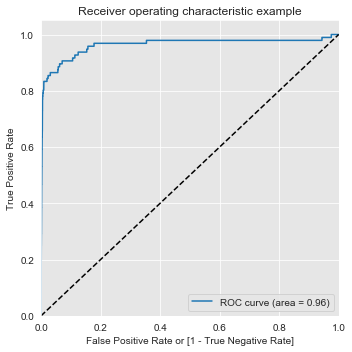

In [300]:
# Model Evaluation parameters of best Logistic Regression Model
evaluation_metrics(y_test,y_test_pred_gnb,y_test_pred_prob_gnb[:,1])

### Compare AUC scores of models on ADASYN over-sampled data

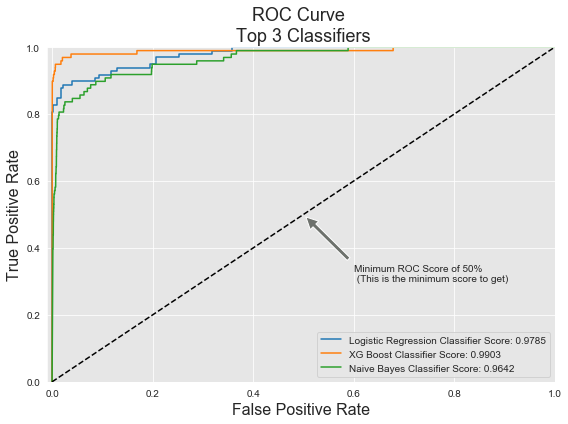

In [433]:
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test, y_test_pred_prob_gnb[:,1])
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_test_pred_prob_lr[:,1])
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_test_pred_prob_xgb[:,1])


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_lr[:,1])))
#     plt.plot(knear_fpr, knear_tpr, label='KNN Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_knn[:,1])))
    plt.plot(tree_fpr, tree_tpr, label='XG Boost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_xgb[:,1])))
    plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_prob_gnb[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    plt.tight_layout()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr,  tree_fpr, tree_tpr)
plt.show()

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

## `SMOTE` oversampling led to best performing model
## `XGBoost` on SMOTE sampled data gave the best performance with ROC-AUC of 0.995 on test dataset

In [425]:
# perform the best oversampling method on X_train & y_train
clf = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
              validate_parameters=False, verbosity=None)
clf.fit(X_train_smote,y_train_smote)
y_test_pred_prob_xgb = clf.predict_proba(X_test)
print(roc_auc_score(y_test,y_test_pred_prob_xgb[:,1]))  

0.9954385436645115


In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [427]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_prob_xgb[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.0007130145


### Final Threshold for decision boundary id 0.07 %